In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Supervised
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

from sklearn.linear_model import LogisticRegression
# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import xgboost as xgb



## Unsupervised
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


## Semi-Supervised
from sklearn.semi_supervised import LabelSpreading


## Deep Learning
# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
# PyTorch
import torch
import torch.nn as nn

# Stardardization and Normalization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Evaluating Models
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [34]:
df_interest = pd.read_csv('data/data_set.csv')
df_interest.head()

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length
0,8.90,735-739,20000.0,20000.0,36.0
1,12.12,715-719,19200.0,19200.0,36.0
2,21.98,690-694,35000.0,35000.0,60.0
3,9.99,695-699,10000.0,9975.0,36.0
4,11.71,695-699,12000.0,12000.0,36.0


In [35]:
df_interest[['fico_low', 'fico_high']] = df_interest['fico_range'].str.split('-', expand=True).astype(int)

In [157]:
df_interest['percent_unfunded'] =  1 - (df_interest['amount_funded_by_investors'] / df_interest['amount_requested'])
df_interest['fico_average'] = (df_interest['fico_high'] + df_interest['fico_low']) / 2
df_interest['monthly interest'] = (df_interest['amount_requested']/df_interest['loan_length'])*(df_interest['interest_rate']/100)
df_interest

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length,fico_low,fico_high,percent_unfunded,fico_average,monthly interest
0,8.90,735-739,20000.0,20000.00,36.0,735,739,0.000000,737.0,49.444444
1,12.12,715-719,19200.0,19200.00,36.0,715,719,0.000000,717.0,64.640000
2,21.98,690-694,35000.0,35000.00,60.0,690,694,0.000000,692.0,128.216667
3,9.99,695-699,10000.0,9975.00,36.0,695,699,0.002500,697.0,27.750000
4,11.71,695-699,12000.0,12000.00,36.0,695,699,0.000000,697.0,39.033333
...,...,...,...,...,...,...,...,...,...,...
2493,16.77,705-709,30000.0,29950.00,60.0,705,709,0.001667,707.0,83.850000
2494,14.09,740-744,16000.0,16000.00,60.0,740,744,0.000000,742.0,37.573333
2495,13.99,680-684,10000.0,10000.00,36.0,680,684,0.000000,682.0,38.861111
2496,12.42,675-679,6000.0,6000.00,36.0,675,679,0.000000,677.0,20.700000


In [158]:
length_interest = df_interest.drop(['fico_range', 'fico_low', 'fico_high', 'amount_funded_by_investors'], axis=1)

length_interest

,interest_rate,amount_requested,loan_length,percent_unfunded,fico_average,monthly interest
0,8.90,20000.0,36.0,0.000000,737.0,49.444444
1,12.12,19200.0,36.0,0.000000,717.0,64.640000
2,21.98,35000.0,60.0,0.000000,692.0,128.216667
3,9.99,10000.0,36.0,0.002500,697.0,27.750000
4,11.71,12000.0,36.0,0.000000,697.0,39.033333
...,...,...,...,...,...,...
2493,16.77,30000.0,60.0,0.001667,707.0,83.850000
2494,14.09,16000.0,60.0,0.000000,742.0,37.573333
2495,13.99,10000.0,36.0,0.000000,682.0,38.861111
2496,12.42,6000.0,36.0,0.000000,677.0,20.700000


In [159]:
# no_length_interest = df_interest.drop(['fico_range', 'fico_low', 'fico_high', 'loan_length', 'amount_funded_by_investors'], axis=1)
no_length_interest = df_interest.drop(['fico_range', 'fico_low', 'fico_high'], axis=1)

no_length_interest

,interest_rate,amount_requested,amount_funded_by_investors,loan_length,percent_unfunded,fico_average,monthly interest
0,8.90,20000.0,20000.00,36.0,0.000000,737.0,49.444444
1,12.12,19200.0,19200.00,36.0,0.000000,717.0,64.640000
2,21.98,35000.0,35000.00,60.0,0.000000,692.0,128.216667
3,9.99,10000.0,9975.00,36.0,0.002500,697.0,27.750000
4,11.71,12000.0,12000.00,36.0,0.000000,697.0,39.033333
...,...,...,...,...,...,...,...
2493,16.77,30000.0,29950.00,60.0,0.001667,707.0,83.850000
2494,14.09,16000.0,16000.00,60.0,0.000000,742.0,37.573333
2495,13.99,10000.0,10000.00,36.0,0.000000,682.0,38.861111
2496,12.42,6000.0,6000.00,36.0,0.000000,677.0,20.700000


In [160]:
# plt.boxplot(no_length_interest, label=no_length_interest.columns);

In [161]:
no_length_interest = no_length_interest[no_length_interest['amount_requested'] <= 31000]
no_length_interest

,interest_rate,amount_requested,amount_funded_by_investors,loan_length,percent_unfunded,fico_average,monthly interest
0,8.90,20000.0,20000.00,36.0,0.000000,737.0,49.444444
1,12.12,19200.0,19200.00,36.0,0.000000,717.0,64.640000
3,9.99,10000.0,9975.00,36.0,0.002500,697.0,27.750000
4,11.71,12000.0,12000.00,36.0,0.000000,697.0,39.033333
5,15.31,6000.0,6000.00,36.0,0.000000,672.0,25.516667
...,...,...,...,...,...,...,...
2493,16.77,30000.0,29950.00,60.0,0.001667,707.0,83.850000
2494,14.09,16000.0,16000.00,60.0,0.000000,742.0,37.573333
2495,13.99,10000.0,10000.00,36.0,0.000000,682.0,38.861111
2496,12.42,6000.0,6000.00,36.0,0.000000,677.0,20.700000


In [162]:
X = no_length_interest.drop(columns='interest_rate', axis =1)
y = no_length_interest['interest_rate']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

model_interest = LinearRegression().fit(Xtrain, ytrain)

interest_pred = model_interest.predict(Xtest)


In [163]:
mse = mean_squared_error(ytest, interest_pred)

# returns the same unit as our target variable
rmse = mse ** 0.5  # Square root of MSE

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MSE: 2.25
RMSE: 1.50


In [164]:
r2 = r2_score(ytest, interest_pred)
print(f"R² Score: {r2:.2f}")

R² Score: 0.88


In [165]:
scaler = MinMaxScaler()

scaled_no_length_train = pd.DataFrame(scaler.fit_transform(Xtrain), columns=Xtrain.columns)
scaled_no_length_test = pd.DataFrame(scaler.fit_transform(Xtest), columns=Xtest.columns)

scaled_no_length_train

,amount_requested,amount_funded_by_investors,loan_length,percent_unfunded,fico_average,monthly interest
0,0.246667,2.709680e-01,0.0,0.000000,0.263158,0.140783
1,0.300000,3.177422e-01,0.0,0.015000,0.131579,0.216560
2,0.233333,2.532260e-01,0.0,0.018750,0.789474,0.104192
3,0.200000,1.782261e-01,0.0,0.210713,0.657895,0.070523
4,0.166667,1.935486e-01,0.0,0.000000,0.157895,0.126087
...,...,...,...,...,...,...
1938,0.233333,2.580648e-01,0.0,0.000000,0.289474,0.140358
1939,0.216667,3.225805e-07,0.0,0.999995,0.236842,0.112591
1940,0.466667,4.766131e-01,0.0,0.015000,0.421053,0.217520
1941,0.066667,9.677448e-02,0.0,0.000000,0.473684,0.022022


In [166]:
X2 = scaled_no_length_train
y2 = ytrain

model_interest = LinearRegression().fit(X2, y2)

interest_pred_2 = model_interest.predict(scaled_no_length_test)

In [167]:
mse = mean_squared_error(ytest, interest_pred_2)

# returns the same unit as our target variable
rmse = mse ** 0.5  # Square root of MSE

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MSE: 3.85
RMSE: 1.96


In [168]:
r2 = r2_score(ytest, interest_pred_2)
print(f"R² Score: {r2:.2f}")

R² Score: 0.79


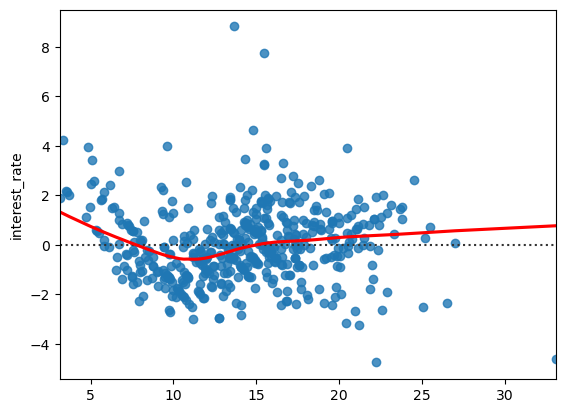

In [175]:
residual = ytest - interest_pred_2

sns.residplot(
        x=interest_pred_2,
        y=residual,
        lowess=True,
        line_kws={'color':'red'},
);

## Logistic Regression